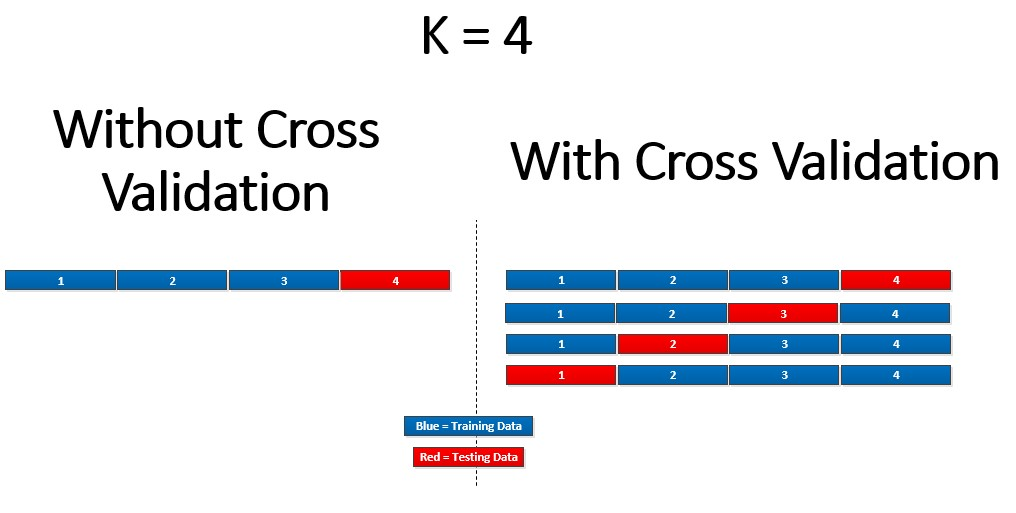



---



#WITHOUT CROSS VALIDATION

##Step 1: Read in Dataset

###1a) Import Libraries

In [84]:
import pandas as pd
import numpy as np

###1b) Import CSV

In [85]:
df = pd.read_csv('https://www.alvinang.sg/s/cleansed_autocsv.csv')

In [86]:
df=df._get_numeric_data()
df.head()

#we only want to get the Numeric Data from the dataset

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1




---



##Step 2: Assigning Columns

###2a) Assign 'price' column to y_data

In [87]:
y_data = df['price']
print(y_data[0:3])

0    13495.0
1    16500.0
2    16500.0
Name: price, dtype: float64


###2b) Assigning all other columns to x_data

In [88]:
x_data=df.drop('price',axis=1)
print(x_data[0:3])

   Unnamed: 0  Unnamed: 0.1  symboling  normalized-losses  wheel-base  \
0           0             0          3                122        88.6   
1           1             1          3                122        88.6   
2           2             2          1                122        94.5   

     length     width  height  curb-weight  engine-size  bore  stroke  \
0  0.811148  0.890278    48.8         2548          130  3.47    2.68   
1  0.811148  0.890278    48.8         2548          130  3.47    2.68   
2  0.822681  0.909722    52.4         2823          152  2.68    3.47   

   compression-ratio  horsepower  peak-rpm  city-mpg  highway-mpg  \
0                9.0       111.0    5000.0        21           27   
1                9.0       111.0    5000.0        21           27   
2                9.0       154.0    5000.0        19           26   

   city-L/100km  diesel  gas  
0     11.190476       0    1  
1     11.190476       0    1  
2     12.368421       0    1  




---



##Step 3: Train Test Split

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

#Test size = 25%
#Train size = 75%
#Random State is a seed for random dataset splitting.

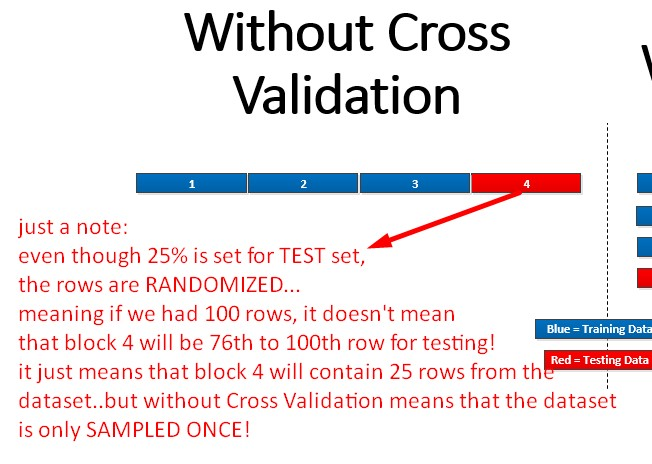



---



##Step 4: Using Linear Regression

In [90]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()

###4a) Fitting Linear Regression Model to Train Dataset

In [91]:
lre.fit(x_train[['horsepower']], y_train)

#we fit a linear model to 'price' vs 'horsepower' 
#(of the TRAIN dataset)

LinearRegression()

###4b) Getting R2 score 

In [92]:
lre.score(x_test[['horsepower']], y_test)

#great fit! 
#linear regression fits 63% of 'price' to 'horsepower' 
#on the TEST dataset!  

0.6296166860021476

###4c) Do a Prediction

In [93]:
yhat = lre.predict(x_test[['horsepower']])
yhat[0:3]

#just for fun, we use the LR model we created
#to predict and preview the first 3 'pricing' rows 
#(labelled as yhat) 

array([12159.57270173,  7182.0124868 ,  9928.25260538])



---



#WITH CROSS VALIDATION

##Step 1: Import Cross_Val_Score from SKLearn

In [94]:
from sklearn.model_selection import cross_val_score



---



##Step 2: Get the Cross_Val_Score

###2a) Use Cross_Val_Score to first fit Linear Regression ot 'horsepower' and 'price

In [95]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

#cv = 4 means 4 folds
#fit Linear Regression to 'horsepower' vs 'price'
#(of the ENTIRE dataset...x_data and y_data....
# NOT just the Train/Test split dataset! i.e.not just x_test...y_test...)

https://stackoverflow.com/questions/25006369/what-is-sklearn-cross-validation-cross-val-score

- scitkit learn doesn't specifically say that "cross_val_score" = R2 or R....
- thus for simplicity, we just take it that it's R2

###2b) Obtain the R2 (or Rcross) for Every Fold

In [96]:
Rcross
#we see that for every fold, the Rcross is between 50 ~ 70%

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

###2c) Obtain the Mean of all 4 R2

In [97]:
print("Rcross mean = ", Rcross.mean())

#we obtain the Average of the 4 folds
#and its 52%!

Rcross mean =  0.522009915042119




---



##Step 3: Do a Prediction using Cross_Val_Predict

###3a) Import Cross_Val_Predict

In [98]:
from sklearn.model_selection import cross_val_predict

In [99]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:3]

array([14141.63807508, 14141.63807508, 20814.29423473])



---



#Comparing WITHOUT vs WITH Cross Validation

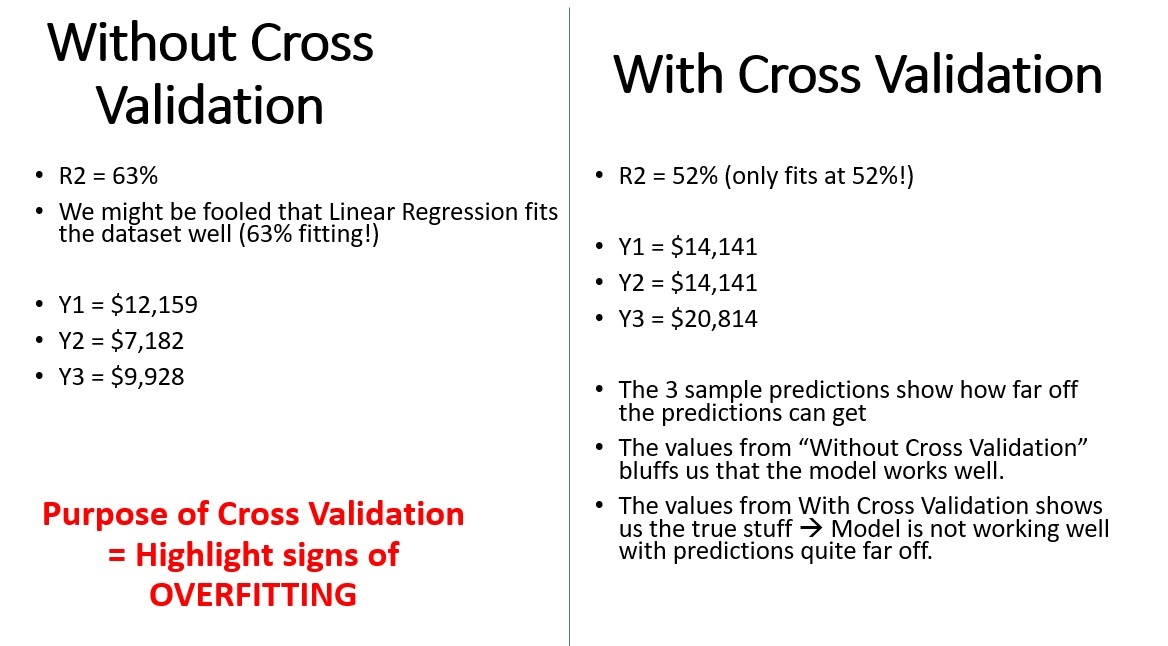



---



#THE END



---

